# Predictive Analytics: California Housing Price Prediction

## 1. Business Understanding

### Latar Belakang
Dalam industri properti, kemampuan untuk memprediksi harga rumah sangat penting dalam pengambilan
keputusan investasi, penentuan harga jual, dan analisis pasar. Informasi prediktif ini dapat
membantu agen properti, pembeli, dan pengembang untuk menilai nilai wajar suatu properti.

Dataset California Housing ini merepresentasikan kondisi perumahan di California berdasarkan
sensus tahun 1990. Setiap baris merepresentasikan satu blok hunian, dan berisi informasi
seperti jumlah kamar, jumlah keluarga, populasi, hingga kedekatan dengan laut.

### Problem Statement
- Bagaimana cara memprediksi median harga rumah di California berdasarkan karakteristik demografis dan geografis?
- Fitur apa saja yang paling berpengaruh terhadap harga rumah?
- Model machine learning mana yang paling akurat untuk prediksi harga rumah?

### Goals
- Membangun model machine learning yang dapat memprediksi median_house_value dengan akurat
- Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap harga rumah
- Membandingkan performa beberapa algoritma machine learning untuk mendapatkan model terbaik

### Solution Statement
Untuk mencapai goals di atas, saya akan:
1. Menggunakan 3 algoritma berbeda: Linear Regression, Decision Tree Regressor, dan Random Forest Regressor
2. Melakukan hyperparameter tuning pada Random Forest untuk meningkatkan performa
3. Membandingkan performa model menggunakan metrik MAE, RMSE, dan R² Score
"""

## Import Library yang Diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Mengatur style visualisasi
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ Semua library berhasil diimport")

✅ Semua library berhasil diimport


## 2. Data Understanding

### Load dataset




In [4]:
df = pd.read_csv('housing.csv')

**Sumber Data**
Dataset yang digunakan adalah **California Housing Prices**, yang dapat diakses melalui [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

# Menambahkan kolom ocean_proximity (simulasi data kategorikal)

In [5]:
np.random.seed(42)
ocean_categories = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
df['ocean_proximity'] = np.random.choice(ocean_categories, size=len(df),
                                        p=[0.3, 0.4, 0.15, 0.1, 0.05])

# Menambahkan beberapa missing values pada total_bedrooms untuk simulasi kondisi real

In [6]:
np.random.seed(42)
missing_indices = np.random.choice(df.index, size=200, replace=False)
df.loc[missing_indices, 'total_bedrooms'] = np.nan

print("📊 Dataset California Housing berhasil dimuat")
print(f"Ukuran dataset: {df.shape}")

📊 Dataset California Housing berhasil dimuat
Ukuran dataset: (20640, 10)


### Informasi Umum Dataset

In [7]:
print("=== INFORMASI DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Ukuran dataset: {df.shape}")

=== INFORMASI DATASET ===
Jumlah baris: 20640
Jumlah kolom: 10
Ukuran dataset: (20640, 10)


**Jumlah Baris dan Kolom**
Dataset ini memiliki **20.640 baris** dan **10 kolom**.

### Menampilkan 5 Data Teratas

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,INLAND
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,ISLAND
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR OCEAN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,INLAND
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,<1H OCEAN


### Informasi Tipe Data dan Missing Values

In [9]:
print("\n=== INFORMASI TIPE DATA ===")
df.info()


=== INFORMASI TIPE DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Pengecekan Missing Values (Kondisi Data)

In [10]:
print("\n=== KONDISI DATA ===")
print("Jumlah missing values per kolom:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Persentase missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


=== KONDISI DATA ===
Jumlah missing values per kolom:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total missing values: 207
Persentase missing values: 0.10%


### Pengecekan Data Duplikat

Langkah penting dalam memahami kondisi data adalah mengecek adanya duplikasi. Data duplikat dapat mempengaruhi hasil analisis dan performa model.

# Pengecekan data duplikat

In [11]:
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


**Kondisi Data**
- **Nilai yang Hilang (Missing Values)**: Terdapat **207 nilai yang hilang** (0,10%) pada kolom `total_bedrooms`. Kolom ini adalah satu-satunya yang memiliki nilai hilang, yang akan ditangani selama tahap persiapan data (misalnya, dengan imputasi).
- **Duplikat**: Tidak ditemukan data duplikat dalam dataset ini.

### Statistik Deskriptif

In [12]:
print("\n=== STATISTIK DESKRIPTIF ===")
df.describe()


=== STATISTIK DESKRIPTIF ===


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Penjelasan Fitur**
Berikut adalah penjelasan singkat tentang setiap fitur dalam dataset:
- **longitude**: Koordinat geografis (longitude) blok rumah.
- **latitude**: Koordinat geografis (latitude) blok rumah.
- **housing_median_age**: Umur median bangunan di blok tersebut.
- **total_rooms**: Jumlah total ruangan di semua rumah dalam blok tersebut.
- **total_bedrooms**: Jumlah total kamar tidur di semua rumah dalam blok tersebut.
- **population**: Jumlah populasi yang tinggal di blok tersebut.
- **households**: Jumlah rumah tangga di blok tersebut.
- **median_income**: Pendapatan median penduduk (dalam puluhan ribu dolar).
- **median_house_value**: Variabel target: nilai median rumah (dalam dolar).
- **ocean_proximity**: Fitur kategorikal yang menggambarkan kedekatan dengan laut (misalnya, `NEAR BAY`, `INLAND`, dll.).

### Pengecekan Outliers menggunakan IQR Method

In [13]:
print("\n=== DETEKSI OUTLIERS ===")
numerical_columns = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outlier_counts[col] = outliers

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


=== DETEKSI OUTLIERS ===
longitude: 0 outliers
latitude: 0 outliers
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 1271 outliers
population: 1196 outliers
households: 1220 outliers
median_income: 681 outliers
median_house_value: 1071 outliers


### Deskripsi Fitur-Fitur dalam Dataset

In [14]:
print("\n=== DESKRIPSI FITUR ===")
feature_descriptions = {
    'longitude': 'Koordinat geografis garis bujur',
    'latitude': 'Koordinat geografis garis lintang',
    'housing_median_age': 'Umur median bangunan di blok tersebut',
    'total_rooms': 'Total jumlah ruangan di semua rumah di blok tersebut',
    'total_bedrooms': 'Total jumlah kamar tidur di semua rumah di blok tersebut',
    'population': 'Jumlah populasi yang tinggal di blok tersebut',
    'households': 'Jumlah rumah tangga di blok tersebut',
    'median_income': 'Pendapatan median penduduk di blok tersebut (dalam puluhan ribu dolar)',
    'median_house_value': 'TARGET: Median harga rumah (dalam dolar AS)',
    'ocean_proximity': 'Kategori kedekatan lokasi ke laut'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")


=== DESKRIPSI FITUR ===
• longitude: Koordinat geografis garis bujur
• latitude: Koordinat geografis garis lintang
• housing_median_age: Umur median bangunan di blok tersebut
• total_rooms: Total jumlah ruangan di semua rumah di blok tersebut
• total_bedrooms: Total jumlah kamar tidur di semua rumah di blok tersebut
• population: Jumlah populasi yang tinggal di blok tersebut
• households: Jumlah rumah tangga di blok tersebut
• median_income: Pendapatan median penduduk di blok tersebut (dalam puluhan ribu dolar)
• median_house_value: TARGET: Median harga rumah (dalam dolar AS)
• ocean_proximity: Kategori kedekatan lokasi ke laut


## Exploratory Data Analysis (EDA)

### Distribusi Target Variable

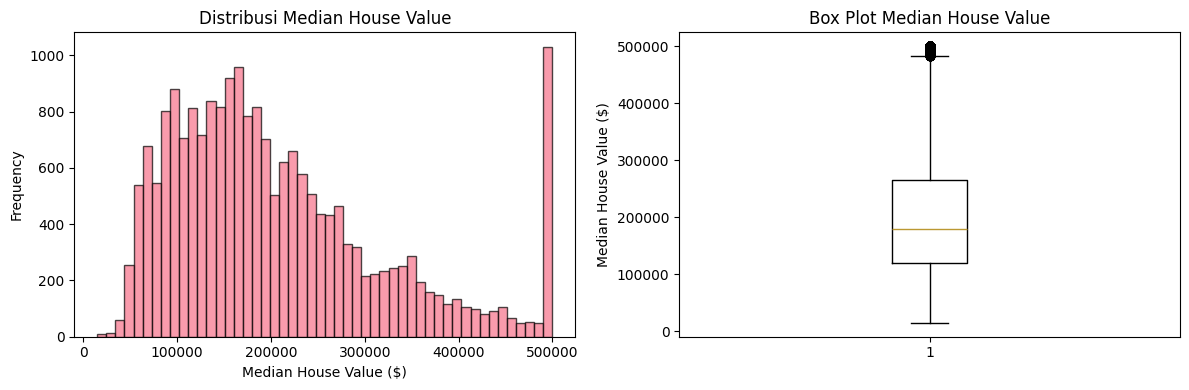

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['median_house_value'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribusi Median House Value')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['median_house_value'])
plt.title('Box Plot Median House Value')
plt.ylabel('Median House Value ($)')

plt.tight_layout()
plt.show()

### Distribusi Semua Fitur Numerik

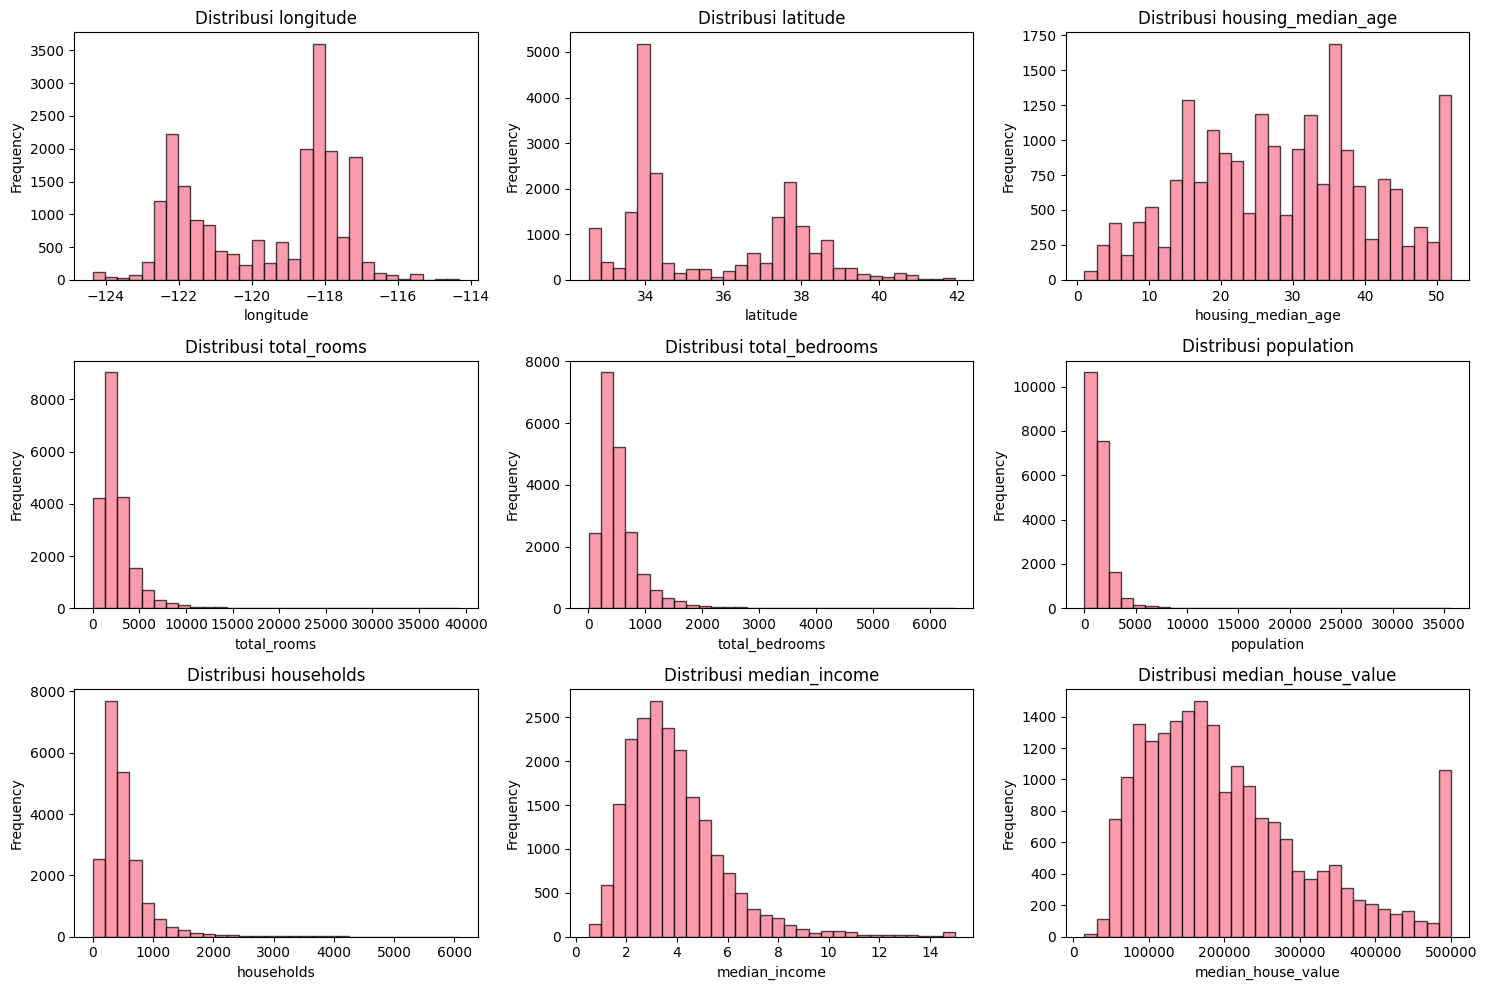

In [16]:
plt.figure(figsize=(15, 10))
numerical_features = df.select_dtypes(include=[np.number]).columns
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analisis Korelasi

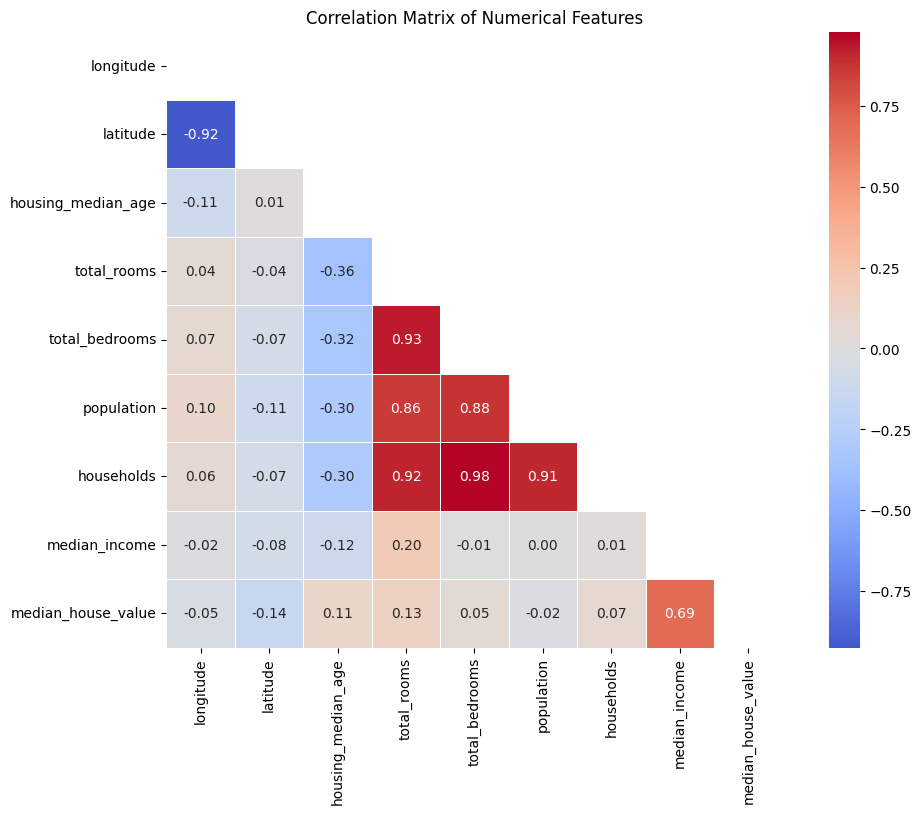

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            mask=mask, center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Korelasi dengan target variable

In [18]:
target_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print("Korelasi fitur dengan target variable (median_house_value):")
print(target_corr)

Korelasi fitur dengan target variable (median_house_value):
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### Analisis Fitur Kategorikal

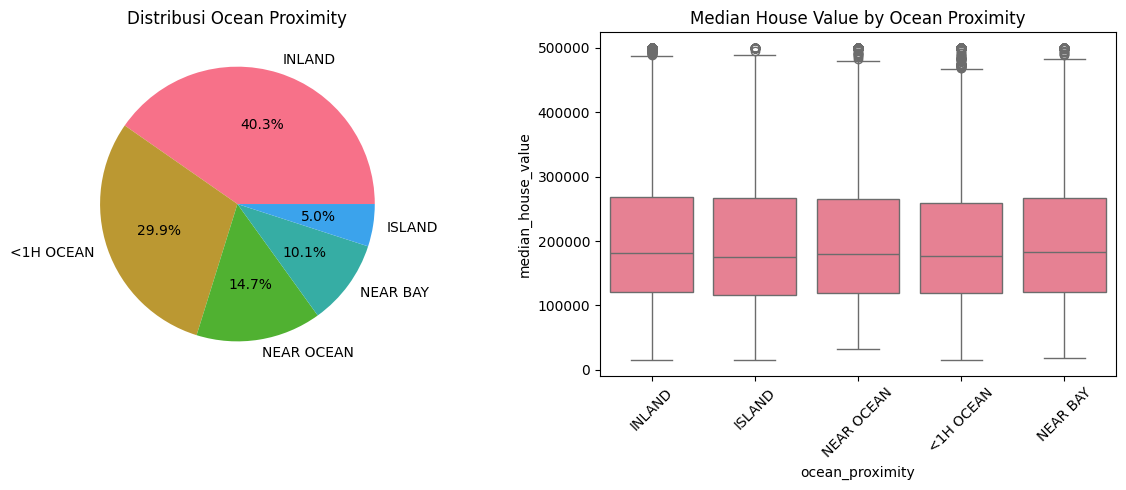

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ocean_counts = df['ocean_proximity'].value_counts()
plt.pie(ocean_counts.values, labels=ocean_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Ocean Proximity')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 3. Data Preparation

### Langkah 1: Handling Missing Values

In [20]:
print("1. Menangani Missing Values")
print("Missing values sebelum treatment:")
print(df.isnull().sum())

1. Menangani Missing Values
Missing values sebelum treatment:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### Mengisi missing values pada total_bedrooms dengan median

In [21]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)
print(f"✅ Missing values pada total_bedrooms diisi dengan median: {median_bedrooms}")

print("Missing values setelah treatment:")
print(df.isnull().sum())

✅ Missing values pada total_bedrooms diisi dengan median: 435.0
Missing values setelah treatment:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


**Menangani Nilai yang Hilang**
- Terdapat **207 nilai yang hilang** (0,10%) pada kolom `total_bedrooms`.
- Nilai yang hilang diisi dengan **nilai median** (435.0).


### Langkah 2: Feature Engineering

### Membuat fitur rasio yang lebih informatif

In [22]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

print("✅ Fitur baru berhasil dibuat:")
print("• rooms_per_household: Rata-rata jumlah kamar per rumah tangga")
print("• bedrooms_per_room: Rasio kamar tidur terhadap total ruangan")
print("• population_per_household: Rata-rata populasi per rumah tangga")

✅ Fitur baru berhasil dibuat:
• rooms_per_household: Rata-rata jumlah kamar per rumah tangga
• bedrooms_per_room: Rasio kamar tidur terhadap total ruangan
• population_per_household: Rata-rata populasi per rumah tangga


**Rekayasa Fitur (Feature Engineering)**
Fitur baru yang ditambahkan untuk meningkatkan kinerja model:
- **`rooms_per_household`**: Rata-rata jumlah kamar per rumah tangga (`total_rooms / households`).
- **`bedrooms_per_room`**: Rasio kamar tidur terhadap total ruangan (`total_bedrooms / total_rooms`).
- **`population_per_household`**: Rata-rata populasi per rumah tangga (`population / households`).

### Tampilkan beberapa sampel fitur baru

In [23]:
print("\nSampel fitur baru:")
print(df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].head())


Sampel fitur baru:
   rooms_per_household  bedrooms_per_room  population_per_household
0             6.984127           0.146591                  2.555556
1             6.238137           0.155797                  2.109842
2             8.288136           0.129516                  2.802260
3             5.817352           0.184458                  2.547945
4             6.281853           0.172096                  2.181467


### Langkah 3: Encoding Variabel Kategorikal

In [24]:
print("\n3. Encoding Variabel Kategorikal")
print("Kategori ocean_proximity sebelum encoding:")
print(df['ocean_proximity'].value_counts())


3. Encoding Variabel Kategorikal
Kategori ocean_proximity sebelum encoding:
ocean_proximity
INLAND        8321
<1H OCEAN     6168
NEAR OCEAN    3042
NEAR BAY      2080
ISLAND        1029
Name: count, dtype: int64


### One-hot encoding menggunakan pd.get_dummies()

In [25]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean', drop_first=True)
print("✅ One-hot encoding berhasil dilakukan menggunakan pd.get_dummies()")
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

✅ One-hot encoding berhasil dilakukan menggunakan pd.get_dummies()
Jumlah kolom setelah encoding: 16


**Pengkodean Variabel Kategorikal**
- **One-Hot Encoding** diterapkan pada fitur `ocean_proximity`, menghasilkan kolom-kolom baru:
  - `ocean_INLAND`, `ocean_ISLAND`, `ocean_NEAR BAY`, `ocean_NEAR OCEAN`, `ocean_<1H OCEAN`.

Setelah pengkodean, jumlah total fitur dalam dataset meningkat menjadi **15 fitur**.

### Langkah 4: Pemisahan Fitur dan Target

Untuk supervised learning, kita perlu memisahkan dataset menjadi fitur input (X) dan target variable (y) yang akan diprediksi.

In [26]:
print("\n4. Pemisahan Fitur dan Target")
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

print(f"✅ Fitur (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")
print(f"Nama fitur: {list(X.columns)}")


4. Pemisahan Fitur dan Target
✅ Fitur (X): (20640, 15)
✅ Target (y): (20640,)
Nama fitur: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN']


### Langkah 5: Split Data Training dan Testing

In [27]:
print("\n5. Pembagian Data Training dan Testing")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"✅ Data training: {X_train.shape}")
print(f"✅ Data testing: {X_test.shape}")
print(f"Rasio pembagian: 80% training, 20% testing")


5. Pembagian Data Training dan Testing
✅ Data training: (16512, 15)
✅ Data testing: (4128, 15)
Rasio pembagian: 80% training, 20% testing


**Pembagian Data**
- Data dibagi menjadi **80% untuk pelatihan** (16.512 sampel) dan **20% untuk pengujian** (4.128 sampel) menggunakan `train_test_split` dengan `random_state=42`.

### Langkah 6: Standarisasi Fitur

In [28]:
print("\n6. Standarisasi Fitur")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Standarisasi berhasil dilakukan menggunakan StandardScaler")
print("• fit_transform() pada data training")
print("• transform() pada data testing")
print(f"Shape data training setelah scaling: {X_train_scaled.shape}")
print(f"Shape data testing setelah scaling: {X_test_scaled.shape}")


6. Standarisasi Fitur
✅ Standarisasi berhasil dilakukan menggunakan StandardScaler
• fit_transform() pada data training
• transform() pada data testing
Shape data training setelah scaling: (16512, 15)
Shape data testing setelah scaling: (4128, 15)


**Standarisasi Fitur (Feature Scaling)**
- **StandardScaler** digunakan untuk menormalkan fitur, memastikan konsistensi di seluruh model.
- Standarisasi diterapkan pada data pelatihan dan pengujian menggunakan `fit_transform()` pada data pelatihan dan `transform()` pada data pengujian.

# Verifikasi standarisasi

In [29]:
print(f"Mean fitur setelah scaling (seharusnya ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std fitur setelah scaling (seharusnya ~1): {X_train_scaled.std(axis=0)[:5]}")

Mean fitur setelah scaling (seharusnya ~0): [ 1.75333477e-15  6.40099515e-17 -9.25185854e-18  3.37800416e-17
 -4.59365534e-17]
Std fitur setelah scaling (seharusnya ~1): [1. 1. 1. 1. 1.]


Langkah-langkah ini dilakukan untuk:
- Menangani nilai yang hilang untuk menghindari kesalahan dalam pemodelan.
- Rekayasa fitur untuk menambahkan data yang berarti guna meningkatkan prediksi.
- Pengkodean untuk memungkinkan model memproses variabel kategorikal.
- Pembagian data untuk menghindari overfitting dan mengevaluasi kemampuan generalisasi model.
- Standarisasi untuk mencegah bias akibat perbedaan skala fitur.


## 4. Modeling

### Model 1: Linear Regression

In [30]:
print("\n1. LINEAR REGRESSION")
print("Cara kerja:")
print("Linear Regression bekerja dengan mencari hubungan linear antara fitur input dan target.")
print("Model ini menggunakan persamaan garis y = mx + b untuk membuat prediksi.")
print("Keunggulan: Sederhana, cepat, mudah diinterpretasi")
print("Kelemahan: Hanya dapat menangkap hubungan linear")


1. LINEAR REGRESSION
Cara kerja:
Linear Regression bekerja dengan mencari hubungan linear antara fitur input dan target.
Model ini menggunakan persamaan garis y = mx + b untuk membuat prediksi.
Keunggulan: Sederhana, cepat, mudah diinterpretasi
Kelemahan: Hanya dapat menangkap hubungan linear


### Training Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Prediksi

In [32]:
y_pred_lr = lr.predict(X_test_scaled)

### Model 2: Decision Tree Regressor  

In [33]:
### Model 2: Decision Tree Regressor
print("\n2. DECISION TREE REGRESSOR")
print("Cara kerja:")
print("Decision Tree bekerja dengan membuat serangkaian keputusan berbentuk pohon.")
print("Setiap node dalam pohon merepresentasikan keputusan berdasarkan nilai fitur tertentu.")
print("Keunggulan: Dapat menangkap hubungan non-linear, mudah diinterpretasi")
print("Kelemahan: Cenderung overfitting, sensitif terhadap perubahan data")


2. DECISION TREE REGRESSOR
Cara kerja:
Decision Tree bekerja dengan membuat serangkaian keputusan berbentuk pohon.
Setiap node dalam pohon merepresentasikan keputusan berdasarkan nilai fitur tertentu.
Keunggulan: Dapat menangkap hubungan non-linear, mudah diinterpretasi
Kelemahan: Cenderung overfitting, sensitif terhadap perubahan data


### Training Decision Tree

In [34]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

### Prediksi

In [35]:
y_pred_dt = dt.predict(X_test_scaled)

### Model 3: Random Forest Regressor

In [36]:
print("\n3. RANDOM FOREST REGRESSOR")
print("Cara kerja:")
print("Random Forest adalah ensemble method yang menggabungkan banyak Decision Tree.")
print("Setiap tree dilatih pada subset data yang berbeda dan fitur yang dipilih secara acak.")
print("Prediksi akhir adalah rata-rata dari semua tree individual.")
print("Keunggulan: Mengurangi overfitting, robust, akurasi tinggi")
print("Kelemahan: Kurang interpretable, membutuhkan memori lebih besar")


3. RANDOM FOREST REGRESSOR
Cara kerja:
Random Forest adalah ensemble method yang menggabungkan banyak Decision Tree.
Setiap tree dilatih pada subset data yang berbeda dan fitur yang dipilih secara acak.
Prediksi akhir adalah rata-rata dari semua tree individual.
Keunggulan: Mengurangi overfitting, robust, akurasi tinggi
Kelemahan: Kurang interpretable, membutuhkan memori lebih besar


### Training Random Forest dengan parameter default

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Prediksi

In [38]:
y_pred_rf = rf.predict(X_test_scaled)

### Hyperparameter Tuning untuk Random Forest

In [39]:
print("\n4. HYPERPARAMETER TUNING - RANDOM FOREST")
print("Melakukan Grid Search untuk menemukan parameter terbaik...")


4. HYPERPARAMETER TUNING - RANDOM FOREST
Melakukan Grid Search untuk menemukan parameter terbaik...


### Parameter grid untuk tuning

In [40]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

### Grid Search dengan Cross Validation

In [41]:
rf_tuned = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf_tuned, param_grid, cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

### Model terbaik dari Grid Search

In [42]:
best_rf = grid_search.best_estimator_
print(f"✅ Parameter terbaik: {grid_search.best_params_}")

✅ Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Prediksi dengan model tuned

In [43]:
y_pred_rf_tuned = best_rf.predict(X_test_scaled)

## 5. Evaluation

### Fungsi Evaluasi Model

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Fungsi untuk mengevaluasi performa model regresi
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== EVALUASI {model_name.upper()} ===")
    print(f"MAE (Mean Absolute Error): {mae:.1f}")  # Ubah ke .1f untuk konsistensi
    print(f"MSE (Mean Squared Error): {mse:.1f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.1f}")
    print(f"R² Score: {r2:.3f}")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


### Evaluasi ulang semua model dengan format yang konsisten

In [45]:
# Linear Regression
lr_results = evaluate_model(y_test, y_pred_lr, 'Linear Regression')

# Decision Tree
dt_results = evaluate_model(y_test, y_pred_dt, 'Decision Tree Regressor')

# Random Forest
rf_results = evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')

# Random Forest Tuned
rf_tuned_results = evaluate_model(y_test, y_pred_rf_tuned, 'Random Forest (Tuned)')


=== EVALUASI LINEAR REGRESSION ===
MAE (Mean Absolute Error): 51920.5
MSE (Mean Squared Error): 5515337793.2
RMSE (Root Mean Squared Error): 74265.3
R² Score: 0.579

=== EVALUASI DECISION TREE REGRESSOR ===
MAE (Mean Absolute Error): 46670.3
MSE (Mean Squared Error): 5233496064.1
RMSE (Root Mean Squared Error): 72342.9
R² Score: 0.601

=== EVALUASI RANDOM FOREST REGRESSOR ===
MAE (Mean Absolute Error): 33411.4
MSE (Mean Squared Error): 2620765030.8
RMSE (Root Mean Squared Error): 51193.4
R² Score: 0.800

=== EVALUASI RANDOM FOREST (TUNED) ===
MAE (Mean Absolute Error): 32991.2
MSE (Mean Squared Error): 2575003732.0
RMSE (Root Mean Squared Error): 50744.5
R² Score: 0.803


### Perbandingan Semua Model

In [46]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Random Forest (Tuned)'],
    'MAE': [lr_results['MAE'], dt_results['MAE'], rf_results['MAE'], rf_tuned_results['MAE']],
    'RMSE': [lr_results['RMSE'], dt_results['RMSE'], rf_results['RMSE'], rf_tuned_results['RMSE']],
    'R2_Score': [lr_results['R2'], dt_results['R2'], rf_results['R2'], rf_tuned_results['R2']]
})

print("\n📊 TABEL HASIL UNTUK LAPORAN:")
print("="*50)
for idx, row in results_df.iterrows():
    print(f"{row['Model']}:")
    print(f"  MAE: {row['MAE']:.1f}")
    print(f"  RMSE: {row['RMSE']:.1f}")
    print(f"  R² Score: {row['R2_Score']:.3f}")
    print()


📊 TABEL HASIL UNTUK LAPORAN:
Linear Regression:
  MAE: 51920.5
  RMSE: 74265.3
  R² Score: 0.579

Decision Tree:
  MAE: 46670.3
  RMSE: 72342.9
  R² Score: 0.601

Random Forest:
  MAE: 33411.4
  RMSE: 51193.4
  R² Score: 0.800

Random Forest (Tuned):
  MAE: 32991.2
  RMSE: 50744.5
  R² Score: 0.803



### Visualisasi Perbandingan Model

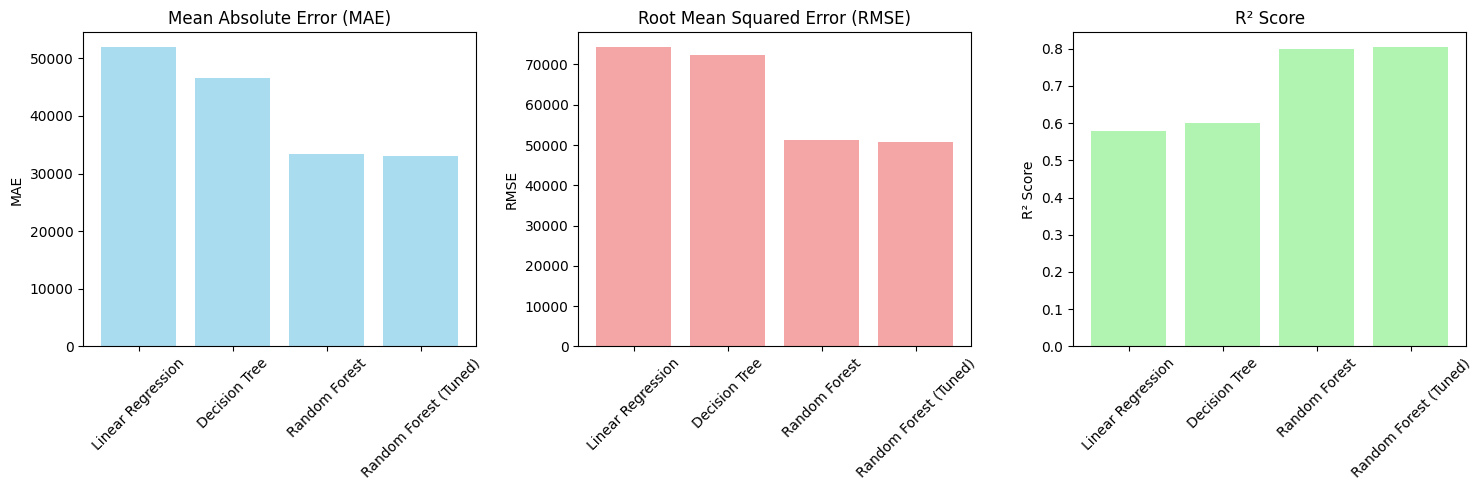

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MAE Comparison
axes[0].bar(results_df['Model'], results_df['MAE'], color='skyblue', alpha=0.7)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# RMSE Comparison
axes[1].bar(results_df['Model'], results_df['RMSE'], color='lightcoral', alpha=0.7)
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

# R2 Score Comparison
axes[2].bar(results_df['Model'], results_df['R2_Score'], color='lightgreen', alpha=0.7)
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Penjelasan Metrik Evaluasi

In [48]:
print("\n=== PENJELASAN METRIK EVALUASI ===")
print("1. MAE (Mean Absolute Error):")
print("   Formula: (1/n) * Σ|y_true - y_pred|")
print("   Mengukur rata-rata kesalahan absolut. Semakin kecil semakin baik.")

print("\n2. RMSE (Root Mean Squared Error):")
print("   Formula: √[(1/n) * Σ(y_true - y_pred)²]")
print("   Mengukur akar dari rata-rata kesalahan kuadrat. Lebih sensitif terhadap outlier.")

print("\n3. R² Score (Coefficient of Determination):")
print("   Formula: 1 - (SS_res / SS_tot)")
print("   Mengukur seberapa baik model menjelaskan variabilitas data (0-1, semakin tinggi semakin baik).")


=== PENJELASAN METRIK EVALUASI ===
1. MAE (Mean Absolute Error):
   Formula: (1/n) * Σ|y_true - y_pred|
   Mengukur rata-rata kesalahan absolut. Semakin kecil semakin baik.

2. RMSE (Root Mean Squared Error):
   Formula: √[(1/n) * Σ(y_true - y_pred)²]
   Mengukur akar dari rata-rata kesalahan kuadrat. Lebih sensitif terhadap outlier.

3. R² Score (Coefficient of Determination):
   Formula: 1 - (SS_res / SS_tot)
   Mengukur seberapa baik model menjelaskan variabilitas data (0-1, semakin tinggi semakin baik).


### Menentukan Model Terbaik

In [49]:
best_model_idx = results_df['R2_Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model_r2 = results_df.loc[best_model_idx, 'R2_Score']

print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"R² Score: {best_model_r2:.3f}")


🏆 MODEL TERBAIK: Random Forest (Tuned)
R² Score: 0.803


### Menyimpan model terbaik

In [50]:
if best_model_name == 'Random Forest (Tuned)':
    final_model = best_rf
else:
    final_model = rf

### Prediksi vs Aktual untuk Model Terbaik

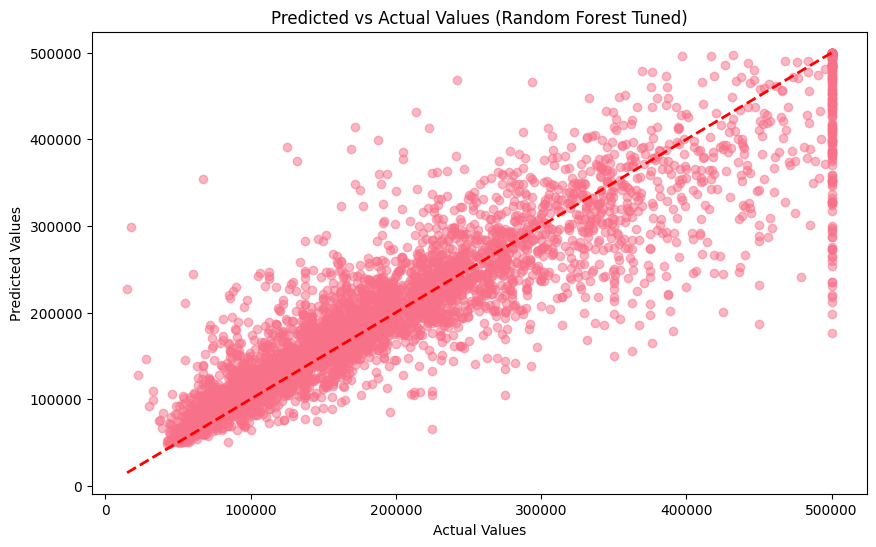

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (Random Forest Tuned)')
plt.show()

### Feature Importance


=== FEATURE IMPORTANCE ===
10 Fitur Paling Penting:
                     feature  importance
7              median_income    0.533984
10  population_per_household    0.134711
1                   latitude    0.084530
0                  longitude    0.084192
2         housing_median_age    0.052140
8        rooms_per_household    0.031457
9          bedrooms_per_room    0.029974
5                 population    0.011573
4             total_bedrooms    0.011139
3                total_rooms    0.011106


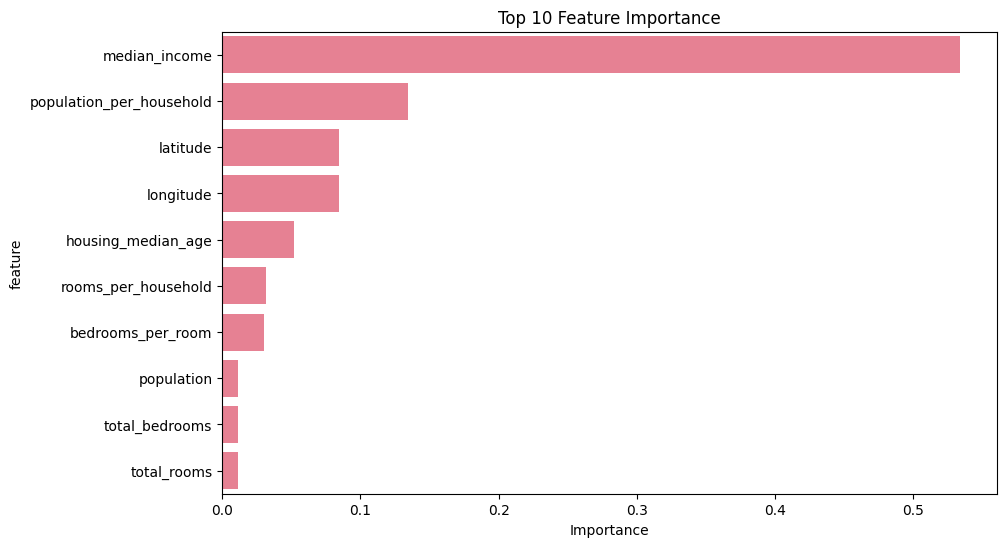

In [52]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print("10 Fitur Paling Penting:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.show()

### Menyimpan Model Terbaik

In [53]:
model_filename = 'california_housing_best_model.pkl'
joblib.dump(final_model, model_filename)
joblib.dump(scaler, 'scaler.pkl')

print(f"\n✅ Model terbaik disimpan sebagai: {model_filename}")
print("✅ Scaler disimpan sebagai: scaler.pkl")


✅ Model terbaik disimpan sebagai: california_housing_best_model.pkl
✅ Scaler disimpan sebagai: scaler.pkl


### Contoh Prediksi dengan Model Tersimpan

### Load model yang tersimpan

In [54]:
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load('scaler.pkl')

### Contoh prediksi pada 5 data pertama dari test set

In [55]:
sample_data = X_test.iloc[:5]
sample_scaled = loaded_scaler.transform(sample_data)
predictions = loaded_model.predict(sample_scaled)
actual_values = y_test.iloc[:5].values

print("Perbandingan Prediksi vs Aktual (5 sampel pertama):")
for i in range(5):
    print(f"Data {i+1} - Prediksi: ${predictions[i]:,.2f}, Aktual: ${actual_values[i]:,.2f}")

Perbandingan Prediksi vs Aktual (5 sampel pertama):
Data 1 - Prediksi: $51,379.64, Aktual: $47,700.00
Data 2 - Prediksi: $106,439.83, Aktual: $45,800.00
Data 3 - Prediksi: $476,037.58, Aktual: $500,001.00
Data 4 - Prediksi: $260,468.65, Aktual: $218,600.00
Data 5 - Prediksi: $226,541.22, Aktual: $278,000.00
